# Linear Regression

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import theano
import pymc3 as pm
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context('notebook')
np.random.seed(12345)
rc = {'xtick.labelsize': 10, 'ytick.labelsize': 10, 'axes.labelsize': 10, 'font.size': 10, 
      'legend.fontsize': 12.0, 'axes.titlesize': 10, "figure.figsize": [14, 6]}
sns.set(rc = rc)
sns.set_style("whitegrid")

## Step 1: Prepare the data

In [2]:
# True parameter values
alpha, sigma = 1, 1
beta = [1, 2.5]

# Size of dataset
size = 100

# Predictor variable
X1 = np.random.randn(size)
X2 = np.random.randn(size) * 0.2

# Simulate outcome variable
Y = alpha + beta[0]*X1 + beta[1]*X2 + np.random.randn(size)*sigma

## Step 2: Build the model

In [3]:
with pm.Model() as lm:
    
    # specify the priors
    alpha = pm.Normal("alpha", mu = 0, sd = 1)
    beta = pm.Normal("beta", mu = 0, sd = 1, shape = 2)
    sigma = pm.HalfCauchy("sigma", beta = 1)
    
    # specify the expected value mu
    mean = alpha + beta[0]*X1 + beta[1]*X2
    
    # specifiy the likelhood
    obs = pm.Normal("obs", mu = mean, sd = sigma, observed = Y)

## Step 3: Sample from the posterior

In [4]:
with lm:
    # obtain starting values via MAP
    start = pm.find_MAP()
    
    step = pm.NUTS(target_accept = 0.99)
    posterior = pm.sample(draws = 5000, njobs = 4, tune = 1000, start = start, step = step)

logp = -144.46, ||grad|| = 13.945: 100%|██████████| 17/17 [00:00<00:00, 709.82it/s]  
100%|██████████| 6000/6000 [00:26<00:00, 229.55it/s]


## Step 4: Diagnose the convergence of MCMC chains

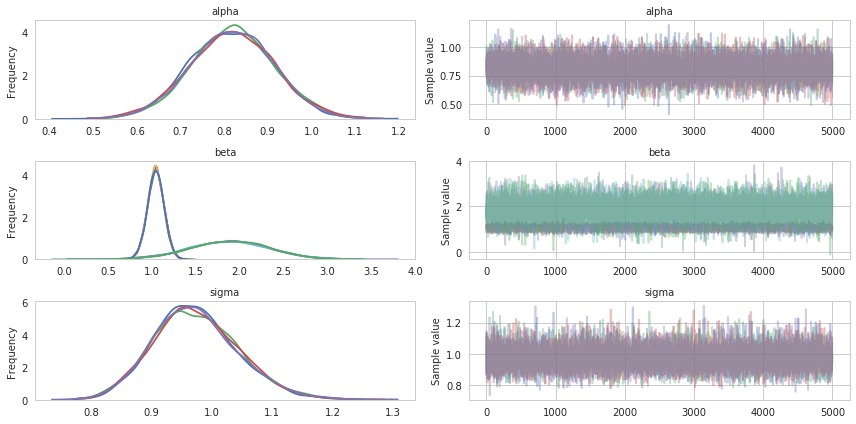

In [3]:
pm.traceplot(posterior)
fig1 = plt.gcf()

In [4]:
pm.gelman_rubin(posterior)

{'alpha': 1.0001345816585712,
 'beta': array([ 0.99996985,  1.00006357]),
 'sigma': 1.0000281236906692}

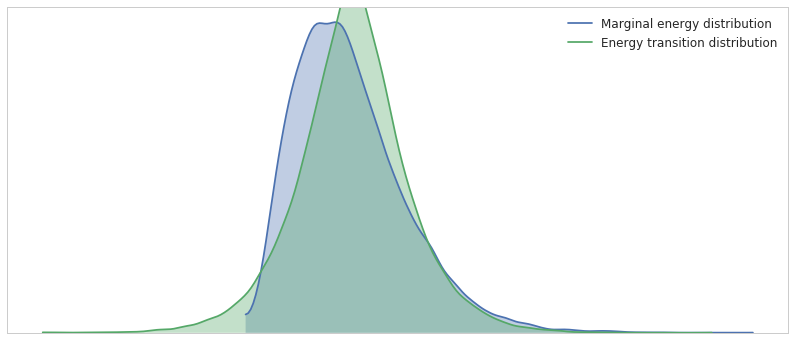

In [5]:
pm.energyplot(posterior)
fig2 = plt.gcf()

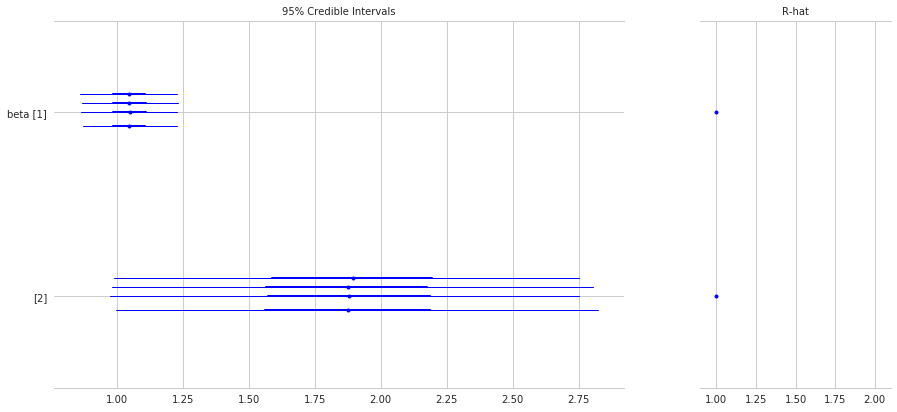

In [6]:
pm.forestplot(posterior, varnames = ["beta"])
fig3 = plt.gcf()

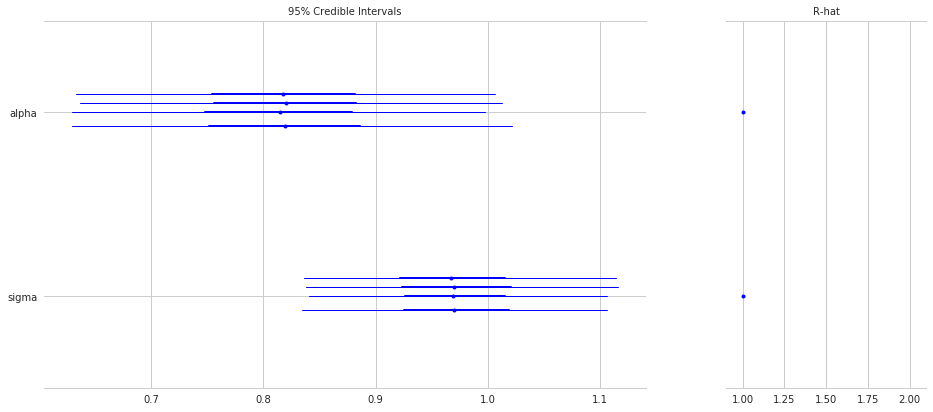

In [7]:
pm.forestplot(posterior, varnames = ["alpha", "sigma"])

## Step 5: Criticize the model

In [14]:
pm.df_summary(posterior)

,mean,sd,mc_error,hpd_2.5,hpd_97.5
alpha,0.817350,0.096413,0.000704,0.629570,1.007968
beta__0,1.045839,0.093135,0.000767,0.860554,1.225598
beta__1,1.875828,0.457441,0.003596,0.993924,2.798766
sigma,0.973192,0.070660,0.000491,0.841049,1.115118


In [19]:
help(pd.DataFrame.to_dict)

Help on function to_dict in module pandas.core.frame:

to_dict(self, orient='dict')
    Convert DataFrame to dictionary.
    
    Parameters
    ----------
    orient : str {'dict', 'list', 'series', 'split', 'records', 'index'}
        Determines the type of the values of the dictionary.
    
        - dict (default) : dict like {column -> {index -> value}}
        - list : dict like {column -> [values]}
        - series : dict like {column -> Series(values)}
        - split : dict like
          {index -> [index], columns -> [columns], data -> [values]}
        - records : list like
          [{column -> value}, ... , {column -> value}]
        - index : dict like {index -> {column -> value}}
    
          .. versionadded:: 0.17.0
    
        Abbreviations are allowed. `s` indicates `series` and `sp`
        indicates `split`.
    
    Returns
    -------
    result : dict like {column -> {index -> value}}



In [23]:
pm.df_summary(posterior).to_dict("list")

{'hpd_2.5': [0.6295700729229746,
  0.8605542997942899,
  0.993923589958385,
  0.8410486409387745],
 'hpd_97.5': [1.00796818102682,
  1.2255976336204342,
  2.7987657593238455,
  1.1151182783189162],
 'mc_error': [0.0007037525535699752,
  0.0007667968524043619,
  0.0035955347391873867,
  0.0004910820143054783],
 'mean': [0.8173503085977575,
  1.0458393518115412,
  1.8758278843366978,
  0.9731921699797598],
 'sd': [0.09641327745794759,
  0.09313498043086794,
  0.4574413168734519,
  0.07066043387383608]}

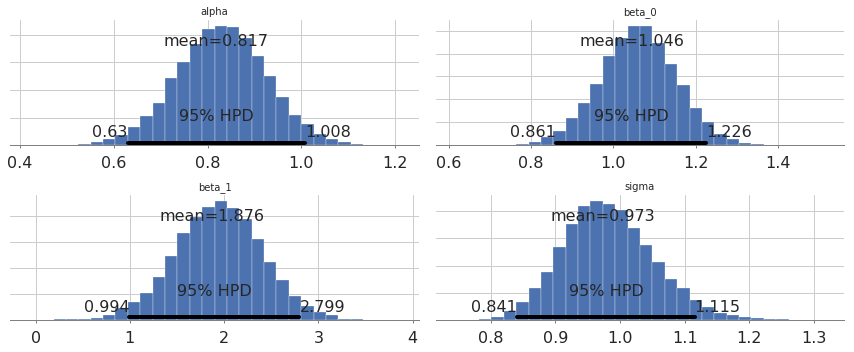

In [9]:
pm.plot_posterior(posterior)
fig4 = plt.gcf()

In [6]:
# save the posterior to the file 'posterior_lm.pkl' for later use
with open('posterior_lm.pkl', 'wb') as f:
    pickle.dump(posterior, f, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# load it at some future point
with open('posterior_lm.pkl', 'rb') as f:
    posterior = pickle.load(f)

In [9]:
type(posterior)

pymc3.backends.base.MultiTrace

In [15]:
posterior.varnames

['alpha', 'beta', 'sigma_log__', 'sigma']

In [13]:
posterior.get_sampler_stats

<bound method MultiTrace.get_sampler_stats of <MultiTrace: 4 chains, 5000 iterations, 4 variables>>

In [18]:
posterior.get_values(varname="beta")

array([[ 0.86729326,  2.07713948],
       [ 1.16087232,  1.93442671],
       [ 0.97910129,  1.92645537],
       ..., 
       [ 1.13134775,  1.38321722],
       [ 0.93722276,  2.59985573],
       [ 1.17096833,  1.8207701 ]])

In [6]:
import plotly as py
py.offline.init_notebook_mode(connected=True)

In [8]:
pm.traceplot(posterior)
fig1 = plt.gcf()
py.offline.iplot_mpl(fig1)
#py.tools.mpl_to_plotly(fig1)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [12]:
py.offline.iplot_mpl(fig2)

/home/emaasit/anaconda3/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:445: UserWarning:

Dang! That path collection is out of this world. I totally don't know what to do with it yet! Plotly can only import path collections linked to 'data' coordinates

/home/emaasit/anaconda3/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:384: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!

/home/emaasit/anaconda3/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:481: UserWarning:

I found a path object that I don't think is part of a bar chart. Ignoring.



In [13]:
py.offline.iplot_mpl(fig3)

/home/emaasit/anaconda3/lib/python3.6/site-packages/plotly/matplotlylib/mplexporter/exporter.py:82: UserWarning:

Blended transforms not yet supported. Zoom behavior may not work as expected.

/home/emaasit/anaconda3/lib/python3.6/site-packages/plotly/matplotlylib/renderer.py:384: UserWarning:

Bummer! Plotly can currently only draw Line2D objects from matplotlib that are in 'data' coordinates!



In [53]:
py.offline.iplot_mpl(fig4)